In [63]:
#libraries
import pandas as pd
from os.path import exists
from os import makedirs
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display



In [64]:
#reading the data

data_folder='../data/'

# Merge data of CSV files we are going to use
#-----------------------------------------------------------------------------------
#INSIDE VS OUTSIDE

# Define data path
dataPath = '../data/birthPlace_spain_v_outside/'
mergedPath = '../data/merged_data/'
if not exists(mergedPath):
    makedirs(mergedPath)


# Define file paths for each year
def merge_csvs_explicit():
    years = range(1997, 2026)  # Only up to 2024 (existing data)
    
    dfs = []
    for year in years:
        file_path = f"{dataPath}{year}_birthPlace_spain_v_outside.csv"
        try:
            df = pd.read_csv(file_path, delimiter=',')
            # Replace '..' with 0 in column 'Value' and coerce to numeric
            if 'Value' in df.columns:
                df['Value'] = df['Value'].replace('..', 0)
                df['Value'] = pd.to_numeric(df['Value'], errors='coerce').fillna(0)
            dfs.append(df)
            print(f"Successfully read {year}")
        except FileNotFoundError:
            print(f"Warning: File for year {year} not found")
    
    if dfs:
        df_all_years = pd.concat(dfs, ignore_index=True)
        print(f"Successfully merged {len(dfs)} files")
        return df_all_years
    else:
        print("No files were found to merge")
        return None


# Concatenate all DataFrames into a single DataFrame
df_combined = merge_csvs_explicit()  # or merge_csvs_explicit()
# Save the combined DataFrame to a new CSV file
df_combined.to_csv(f"{mergedPath}merged_birthPlace_spain_v_outside.csv", index=False)
print("Merged data saved to 'merged_birthPlace_spain_v_outside.csv'")


#----------------------------------------------------------------------------------------
#BIRTH REGION
# Define data path
dataPath = '../data/birthPlaceRegion/'
mergedPath = '../data/merged_data/'
if not exists(mergedPath):
    makedirs(mergedPath)


# Define file paths for each year
def merge_csvs_explicit():
    years = range(1997, 2026)  # Only up to 2024 (existing data)
    
    dfs = []
    for year in years:
        file_path = f"{dataPath}{year}_birthPlaceRegion_sex.csv"
        try:
            df = pd.read_csv(file_path, delimiter=',')
            # Replace '..' with 0 in column 'Value' and coerce to numeric
            if 'Value' in df.columns:
                df['Value'] = df['Value'].replace('..', 0)
                df['Value'] = pd.to_numeric(df['Value'], errors='coerce').fillna(0)
            dfs.append(df)
            print(f"Successfully read {year}")
        except FileNotFoundError:
            print(f"Warning: File for year {year} not found")
    
    if dfs:
        df_all_years = pd.concat(dfs, ignore_index=True)
        print(f"Successfully merged {len(dfs)} files")
        return df_all_years
    else:
        print("No files were found to merge")
        return None


# Concatenate all DataFrames into a single DataFrame
df_combined_2 = merge_csvs_explicit()  # or merge_csvs_explicit()
# Save the combined DataFrame to a new CSV file
df_combined_2.to_csv(f"{mergedPath}merged_birthPlaceRegion_sex.csv", index=False)
print("Merged data saved to 'merged_birthPlaceRegion_sex.csv'")





Successfully read 1997
Successfully read 1998
Successfully read 1999
Successfully read 2000
Successfully read 2001
Successfully read 2002
Successfully read 2003
Successfully read 2004
Successfully read 2005
Successfully read 2006
Successfully read 2007
Successfully read 2008
Successfully read 2009
Successfully read 2010
Successfully read 2011
Successfully read 2012
Successfully read 2013
Successfully read 2014
Successfully read 2015
Successfully read 2016
Successfully read 2017
Successfully read 2018
Successfully read 2019
Successfully read 2020
Successfully read 2021
Successfully read 2022
Successfully read 2023
Successfully read 2024
Successfully read 2025
Successfully merged 29 files
Merged data saved to 'merged_birthPlace_spain_v_outside.csv'
Successfully read 1997
Successfully read 1998
Successfully read 1999
Successfully read 2000
Successfully read 2001
Successfully read 2002
Successfully read 2003
Successfully read 2004
Successfully read 2005
Successfully read 2006
Successfully 

In [65]:
#INSIDE vs OUTSIDE 
df_combined=df_combined.drop(columns=["AEB"])
df_combined = (
    df_combined.groupby(
        ['Year_Reference', 'District', 'Neighborhood', 'Birth_Place', "Sex"],  # we group by neighborhoods
        as_index=False
    )['Value'].sum()
)
df_combined

,Year_Reference,District,Neighborhood,Birth_Place,Sex,Value
0,1997,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",City of Barcelona,Female,5526
1,1997,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",City of Barcelona,Male,4907
2,1997,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Not available,Female,0
3,1997,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Rest of Catalonia,Female,930
4,1997,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Rest of Catalonia,Male,653
...,...,...,...,...,...,...
23718,2025,Sarrià-Sant Gervasi,les Tres Torres,Rest of European Union,Male,338
23719,2025,Sarrià-Sant Gervasi,les Tres Torres,Rest of Spain,Female,896
23720,2025,Sarrià-Sant Gervasi,les Tres Torres,Rest of Spain,Male,633
23721,2025,Sarrià-Sant Gervasi,les Tres Torres,Rest of World,Female,1428


In [66]:
#BIRTH REGION
df_combined_2


,Year_Reference,District,Neighborhood,Value,Birth_Place_Region,Sex
0,1997,Ciutat Vella,el Raval,0,Eastern Africa,Female
1,1997,Ciutat Vella,el Raval,0,Eastern Africa,Male
2,1997,Ciutat Vella,el Raval,5,Middle Africa,Female
3,1997,Ciutat Vella,el Raval,5,Middle Africa,Male
4,1997,Ciutat Vella,el Raval,441,Northern Africa,Female
...,...,...,...,...,...,...
72893,2025,Sant Martí,la Verneda i la Pau,100,Western Europe,Male
72894,2025,Sant Martí,la Verneda i la Pau,0,Australia and New Zealand,Female
72895,2025,Sant Martí,la Verneda i la Pau,0,Australia and New Zealand,Male
72896,2025,Sant Martí,la Verneda i la Pau,0,Not available,Female


In [67]:
#First we study inside Spain vs Outside spain
df_combined_y=df_combined[df_combined["Year_Reference"].isin(np.arange(2000,2026,5))]
df_sum_gender = (
    df_combined_y.groupby(
        ['Year_Reference', 'District', 'Neighborhood', 'Birth_Place'],  # todas menos 'Sex'
        as_index=False
    )['Value'].sum()
)



In [68]:
spain = df_sum_gender[df_sum_gender['Birth_Place'].isin(['City of Barcelona', 'Rest of Catalonia',\
        'Rest of Spain'])].groupby(['Neighborhood',"Year_Reference"], as_index=False)['Value'].sum().\
        rename(columns={'Value':'Population_Spain'})

outside=df_sum_gender[df_sum_gender['Birth_Place'].isin(["Rest of European Union","Rest of World"])]\
        .groupby(['Neighborhood',"Year_Reference"], as_index=False)['Value'].sum().\
        rename(columns={'Value':'Population_Outside'})

spain_vs_outside = pd.merge(spain, outside, on=['Neighborhood',"Year_Reference"], how='outer').fillna(0)

spain_vs_outside['Total_population'] = spain_vs_outside['Population_Spain'] + spain_vs_outside['Population_Outside']

spain_vs_outside['Percent_outside_Spain'] = (spain_vs_outside['Population_Outside'] / spain_vs_outside\
        ['Total_population'] * 100).round(2)

spain_vs_outside_2=spain_vs_outside.drop(columns=['Population_Outside',"Total_population"])
spain_vs_outside


,Neighborhood,Year_Reference,Population_Spain,Population_Outside,Total_population,Percent_outside_Spain
0,Baró de Viver,2000,2327,29,2356,1.23
1,Baró de Viver,2005,2269,107,2376,4.50
2,Baró de Viver,2010,2164,224,2388,9.38
3,Baró de Viver,2015,2112,370,2482,14.91
4,Baró de Viver,2020,2082,543,2625,20.69
...,...,...,...,...,...,...
433,les Tres Torres,2005,13483,1858,15341,12.11
434,les Tres Torres,2010,13712,2016,15728,12.82
435,les Tres Torres,2015,14194,2307,16501,13.98
436,les Tres Torres,2020,14183,2458,16641,14.77


In [69]:
#Now we analyse how the variation of the immigrant percentage affects the local population the next year
df = spain_vs_outside_2.sort_values(['Neighborhood', 'Year_Reference'])

#Population_Spain: (i+1) - i
df['Pop_Spain_diff'] = df.groupby('Neighborhood')['Population_Spain'].diff(-1) * -1

#Percent_outside_Spain: i - (i-1)
df['Perc_Outside_diff'] = df.groupby('Neighborhood')['Percent_outside_Spain'].diff()

# Selection
result = df[['Neighborhood', 'Year_Reference',
                'Pop_Spain_diff', 'Perc_Outside_diff']]

# We eliminate the rows with NaN
result = result.dropna(subset=['Pop_Spain_diff', 'Perc_Outside_diff'])

result


,Neighborhood,Year_Reference,Pop_Spain_diff,Perc_Outside_diff
1,Baró de Viver,2005,-105.0,3.27
2,Baró de Viver,2010,-52.0,4.88
3,Baró de Viver,2015,-30.0,5.53
4,Baró de Viver,2020,-176.0,5.78
7,Can Baró,2005,-332.0,7.84
...,...,...,...,...
430,les Roquetes,2020,-761.0,6.84
433,les Tres Torres,2005,229.0,6.16
434,les Tres Torres,2010,482.0,0.71
435,les Tres Torres,2015,-11.0,1.16


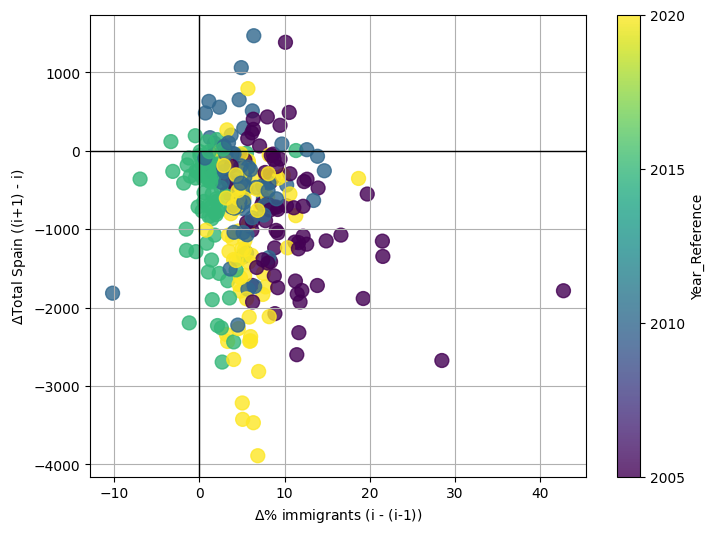

In [70]:

plt.figure(figsize=(8,6))

# Scatter plot con color por año
sc = plt.scatter(
    result['Perc_Outside_diff'], 
    result['Pop_Spain_diff'], 
    c=result['Year_Reference'],   # color según año
    cmap='viridis',                  # puedes cambiar a 'plasma', 'coolwarm', etc.
    s=100,                           # tamaño de los puntos
    alpha=0.8
)

plt.xlabel(r'$\Delta$% immigrants (i - (i-1))')
plt.ylabel(r'$\Delta$Total Spain ((i+1) - i)')
plt.axhline(0, color='black', linewidth=1)  
plt.axvline(0, color='black', linewidth=1)

# Barra de color para ver qué año corresponde a cada color
cbar = plt.colorbar(sc)
cbar.set_label('Year_Reference')
cbar.set_ticks(np.arange(2005,2021,5))
cbar.set_ticklabels(["2005", "2010", "2015", "2020"])

plt.grid(True)
plt.show()


In [71]:
#Now we study region differences
df_combined_2

,Year_Reference,District,Neighborhood,Value,Birth_Place_Region,Sex
0,1997,Ciutat Vella,el Raval,0,Eastern Africa,Female
1,1997,Ciutat Vella,el Raval,0,Eastern Africa,Male
2,1997,Ciutat Vella,el Raval,5,Middle Africa,Female
3,1997,Ciutat Vella,el Raval,5,Middle Africa,Male
4,1997,Ciutat Vella,el Raval,441,Northern Africa,Female
...,...,...,...,...,...,...
72893,2025,Sant Martí,la Verneda i la Pau,100,Western Europe,Male
72894,2025,Sant Martí,la Verneda i la Pau,0,Australia and New Zealand,Female
72895,2025,Sant Martí,la Verneda i la Pau,0,Australia and New Zealand,Male
72896,2025,Sant Martí,la Verneda i la Pau,0,Not available,Female


In [80]:
#functions
def filtre_regions(llista_regions,data_frame):

    df_filtrat = data_frame[data_frame["Birth_Place_Region"].isin(llista_regions)]

    df_sumat = (df_filtrat.groupby(["Year_Reference", "Neighborhood","Total_population","Population_Spain"]\
        , as_index=False)["Value"].sum()) #sum for different birth place regions
    
    df_sumat['Percent_region'] = (df_sumat['Value'] / df_sumat['Total_population'] * 100).round(2)
    df_sumat=df_sumat.drop(columns=["Value","Total_population"])
    df = df_sumat.sort_values(['Neighborhood', 'Year_Reference'])

    # Population_Spain: (i+1) - i
    df['Pop_Spain_diff'] = df.groupby('Neighborhood')['Population_Spain'].diff(-1) * -1

    # Percent_outside_Spain: i - (i-1)
    df['Perc_Outside_diff'] = df.groupby('Neighborhood')['Percent_region'].diff()

    # Selection
    result = df[['Neighborhood', 'Year_Reference',
                    'Pop_Spain_diff', 'Perc_Outside_diff']]

    # We delete the rows with NaN's
    result = result.dropna(subset=['Pop_Spain_diff', 'Perc_Outside_diff'])
    return result

def grafics(ax, result, x_max, x_min, y_max, y_min):
    # Scatter plot con color por año
    sc = ax.scatter(
        result['Perc_Outside_diff'], 
        result['Pop_Spain_diff'], 
        c=result['Year_Reference'],
        cmap='viridis',
        s=80,
        edgecolor='black',
        linewidth=0.5,
        alpha=0.8
    )

    ax.set_xlabel(r'$\Delta$% immigrants (i - (i-5))')
    ax.set_ylabel(r'$\Delta$Total Spain ((i+5) - i)')
    ax.set_xlim(x_min - 0.5, x_max + 0.5)
    ax.set_ylim(y_min - 100,   y_max + 100)
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    ax.grid(True, linestyle='--', alpha=0.4)

    return sc

def representacio_regions_districte(districte,si):
    #Filtre anys
    df_combined_3=df_combined_2[df_combined_2["Year_Reference"].isin(np.arange(2000,2026,5))]
    #Sum women and men
    df_sum_gender = (
    df_combined_3.groupby(
        ['Year_Reference', 'District', 'Neighborhood',
         'Birth_Place_Region'],  # todas menos 'Sex'
        as_index=False
    )['Value'].sum()
    )

    #regions (filtered by district?)
    if si==True:
        df_regions=df_sum_gender[df_sum_gender["District"].isin([districte])]
    else:
        df_regions=df_sum_gender
    df_regions=df_regions.drop(columns=["District"])

    #We merge the data frames and redefine the Southern Europe region
    df = df_regions.merge(spain_vs_outside, on=["Neighborhood", "Year_Reference"], how="left")
    df["Value"] = df.apply(
        lambda row: row["Value"] - row["Population_Spain"]
        if row["Birth_Place_Region"] == "Southern Europe"
        else row["Value"],
        axis=1
    )

    #different regions
    Africa_df=filtre_regions(region_list[0],df)
    Af_As_df=filtre_regions(region_list[1],df)
    SAmerica_df=filtre_regions(region_list[2],df)
    Asia_df=filtre_regions(region_list[3],df)
    Europe_df=filtre_regions(region_list[4],df)
    America_Asutralia=filtre_regions(region_list[5],df)

    llista_resultats=[Africa_df,Af_As_df,SAmerica_df,Asia_df,Europe_df,America_Asutralia]

    x_max=0
    x_min=0
    y_min=0
    y_max=0
    for i in llista_resultats:
        a=i['Pop_Spain_diff'].max()
        b=i['Pop_Spain_diff'].min()
        c=i['Perc_Outside_diff'].max()
        d=i['Perc_Outside_diff'].min()
        x_max=max(c,x_max)
        x_min=min(d,x_min)
        y_max=max(a,y_max)
        y_min=min(b,y_min)
    
    
    #grafics
    fig, axs = plt.subplots(2, 3, figsize=(16, 9), constrained_layout=True)
    axs = axs.flatten()

    last_scatter = None

    for i in range(6):
        ax = axs[i]
        last_scatter = grafics(ax, llista_resultats[i],x_max, x_min, y_max, y_min)
        ax.set_title(region_names[i])

    # Colorbar global
    cbar = fig.colorbar(last_scatter, ax=axs, orientation='vertical')
    cbar.set_label('Lustrum')
    cbar.set_ticks(np.arange(2005,2021,5))
    cbar.set_ticklabels(["2005", "2010", "2015", "2020"])

    # mover colorbar
    cbar.ax.set_position([0.88, 0.15, 0.02, 0.7])

    plt.show()
    
    
    

In [82]:
districtes = df_combined_2['District'].unique().tolist()
#regions
region_list = [["Eastern Africa","Middle Africa","Southern Africa","Western Africa"],["Northern Africa","Western Asia"],\
            ["Caribbean","Central America","South America"],["Southern Asia","South-Eastern Asia","Eastern Asia"],\
                ["Eastern Europe","Northern Europe","Southern Europe"],["Australia and New Zealand","Northern America"]]

region_names=["Africa","NA-ME","Latin American", "Asia", "Europe", "NA-AUS-NZ"]

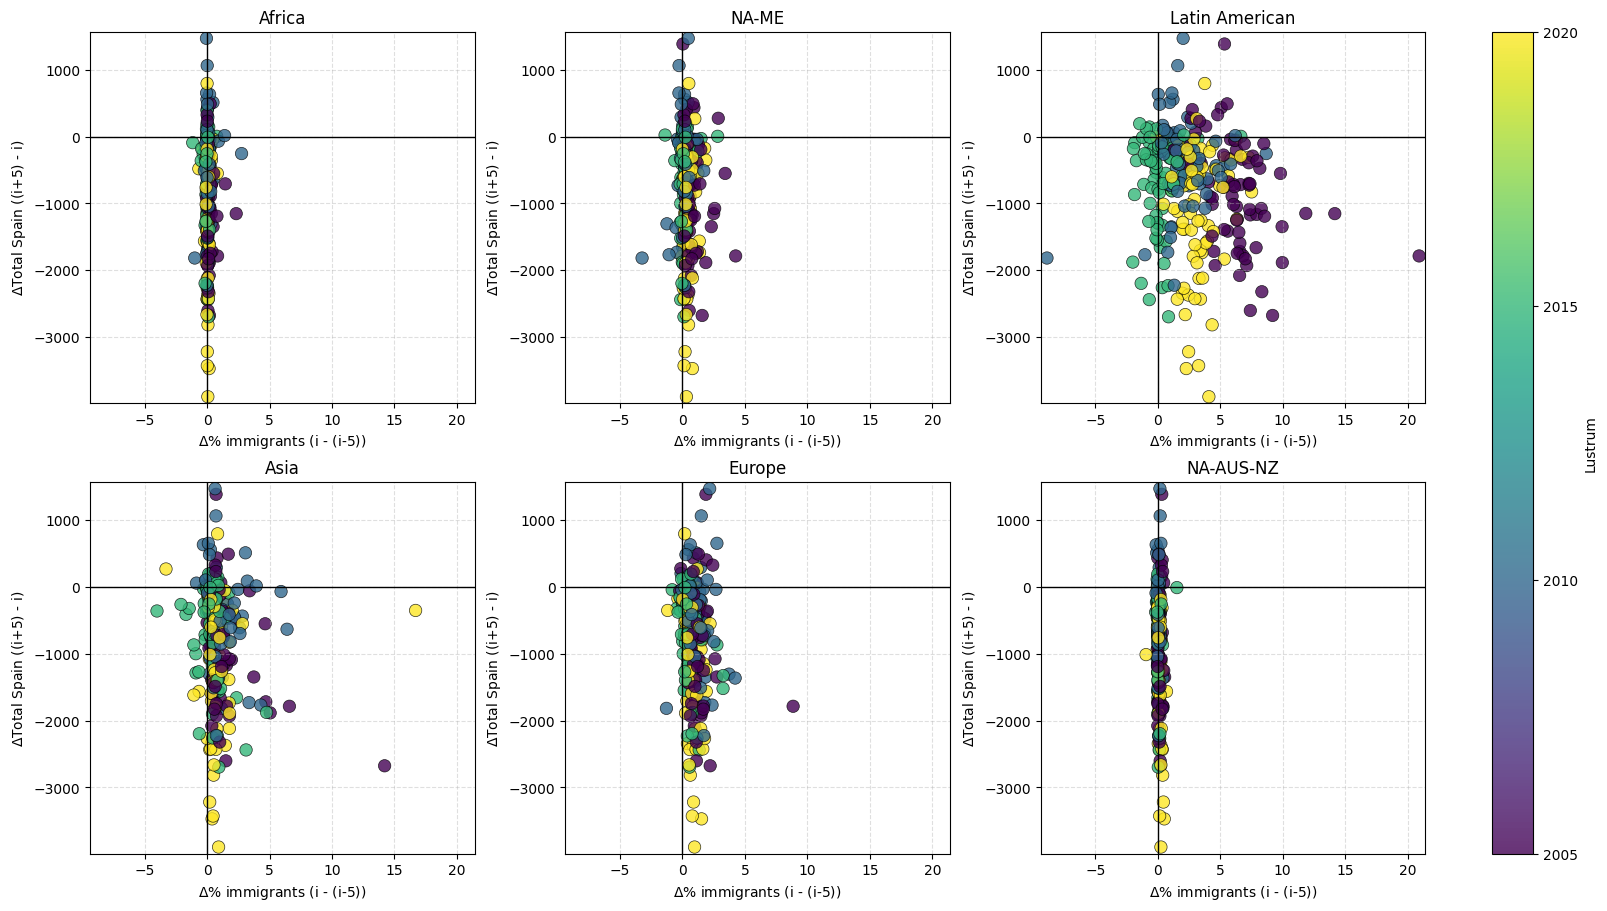

In [83]:
representacio_regions_districte("Hola",False)

Ciutat Vella


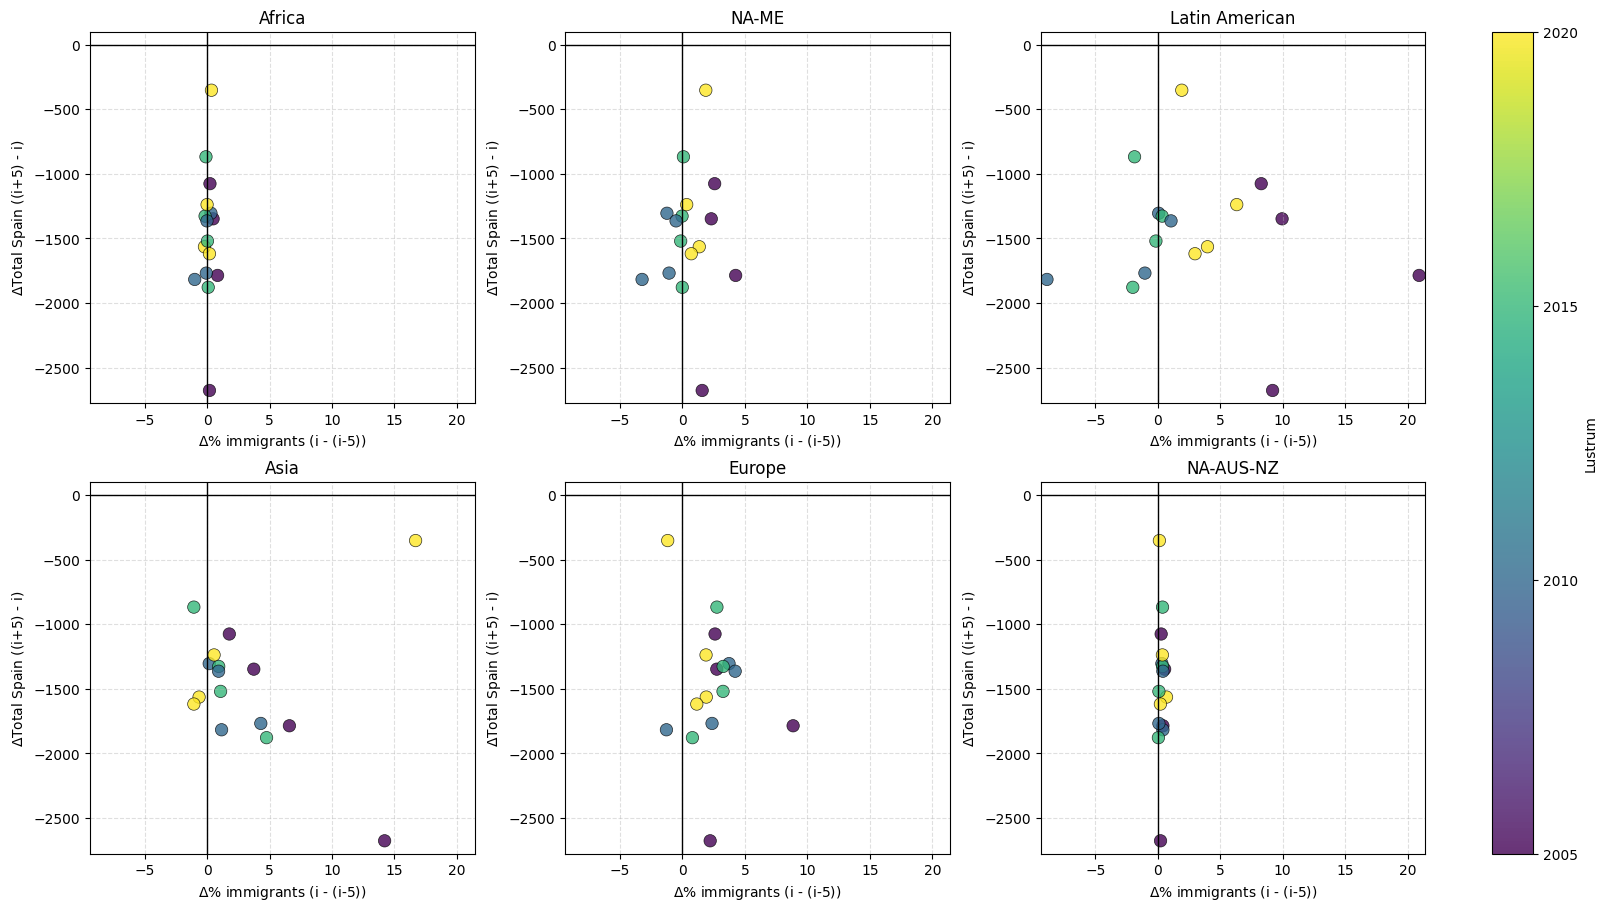

Eixample


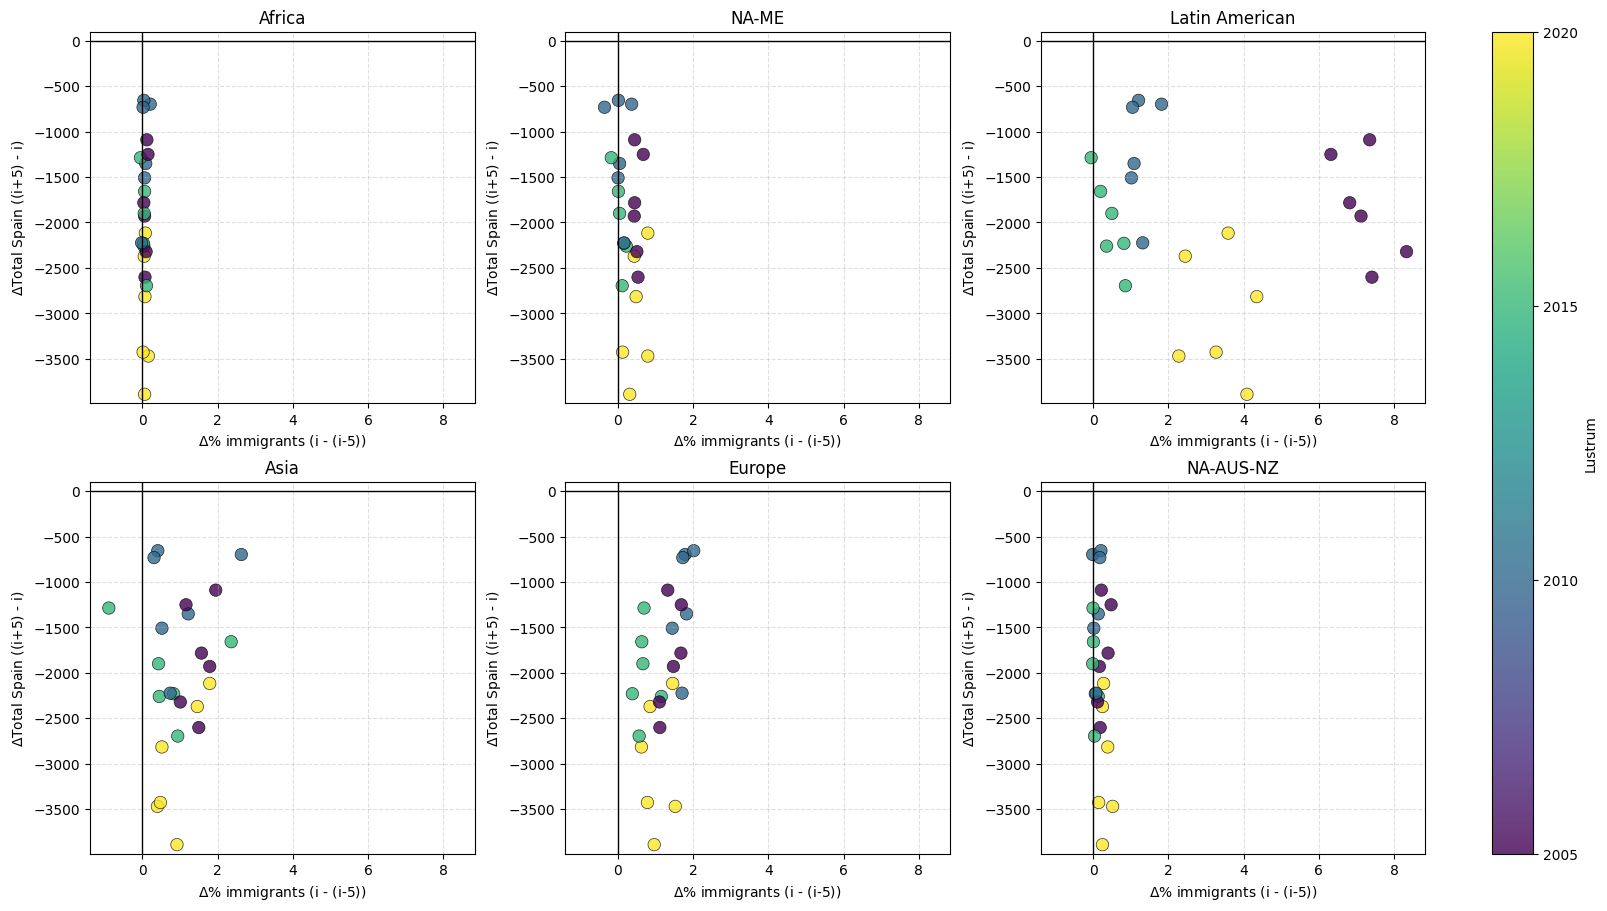

Sants-Montjuïc


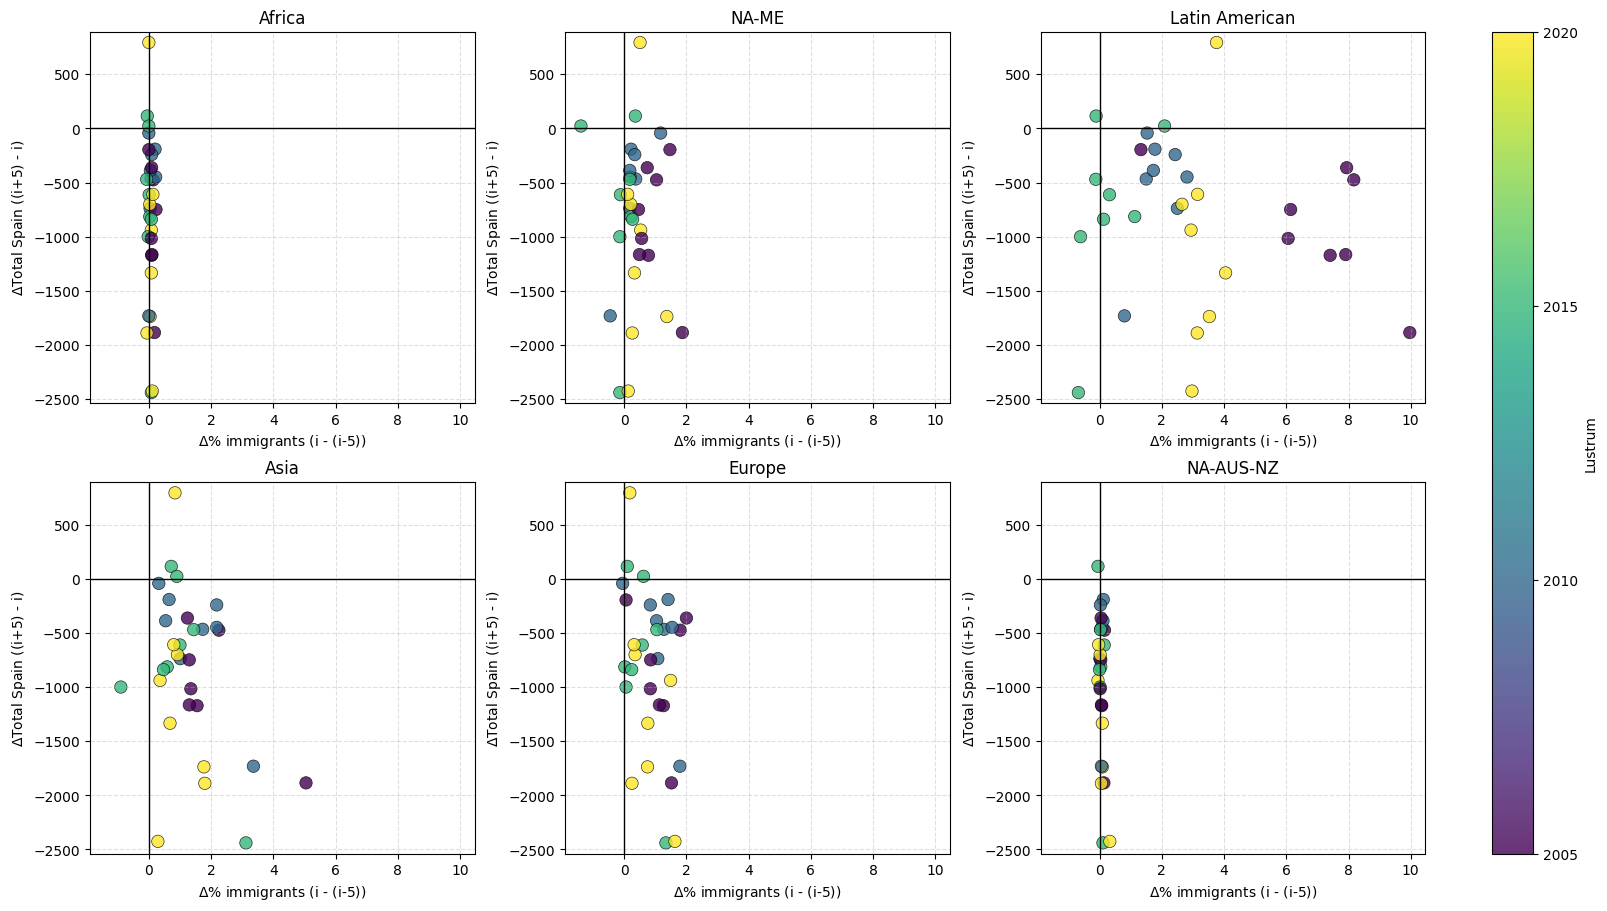

Les Corts


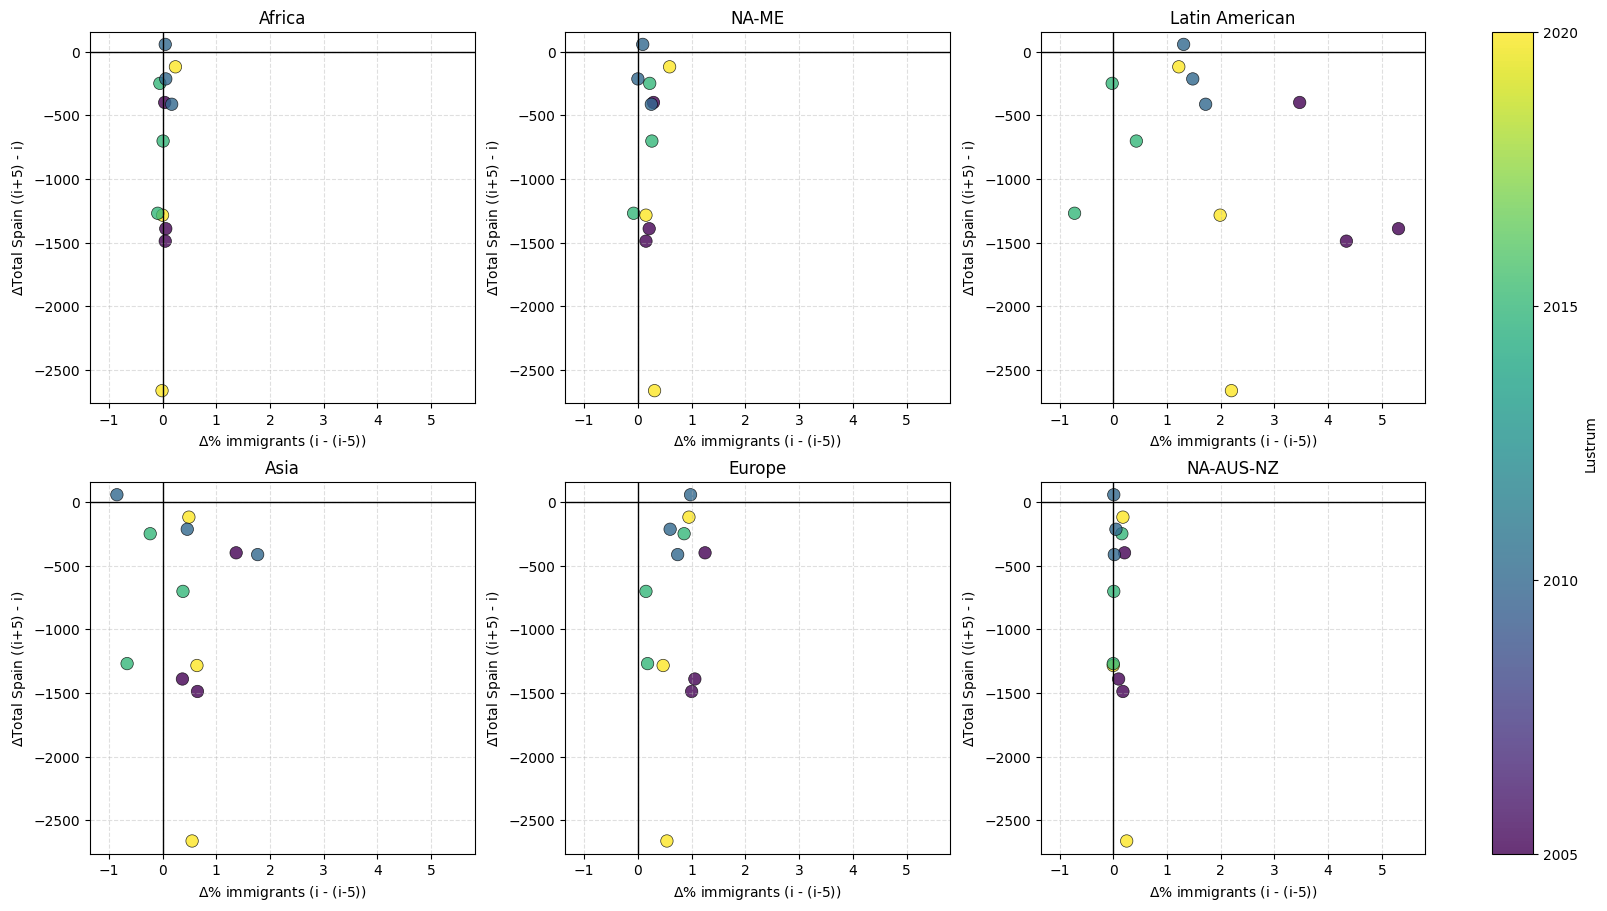

Sarrià-Sant Gervasi


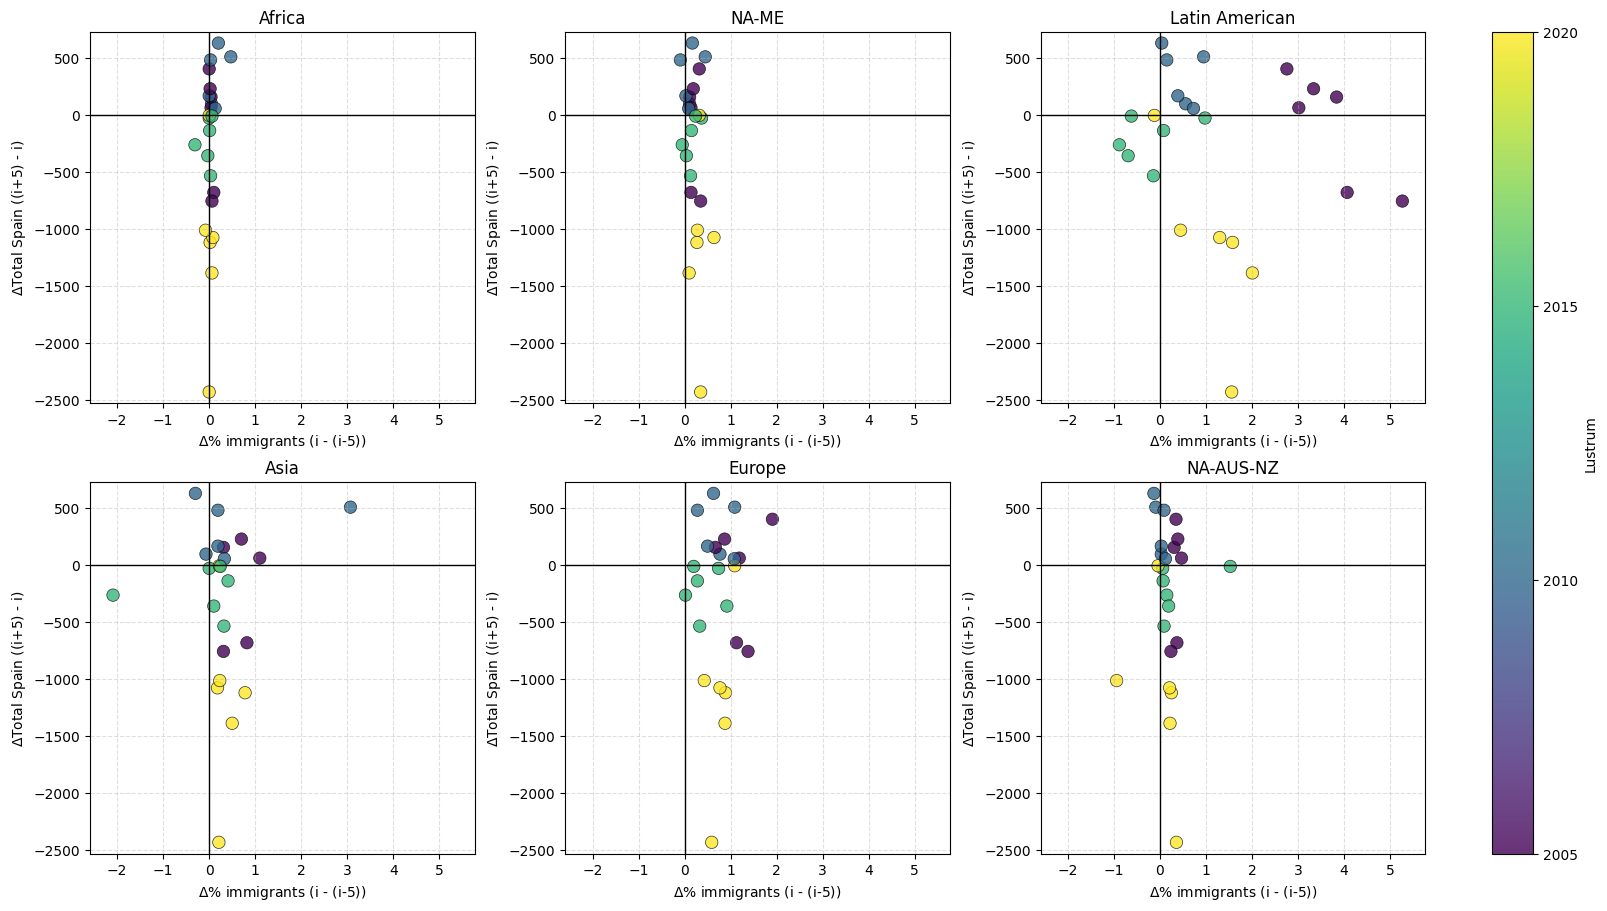

Gràcia


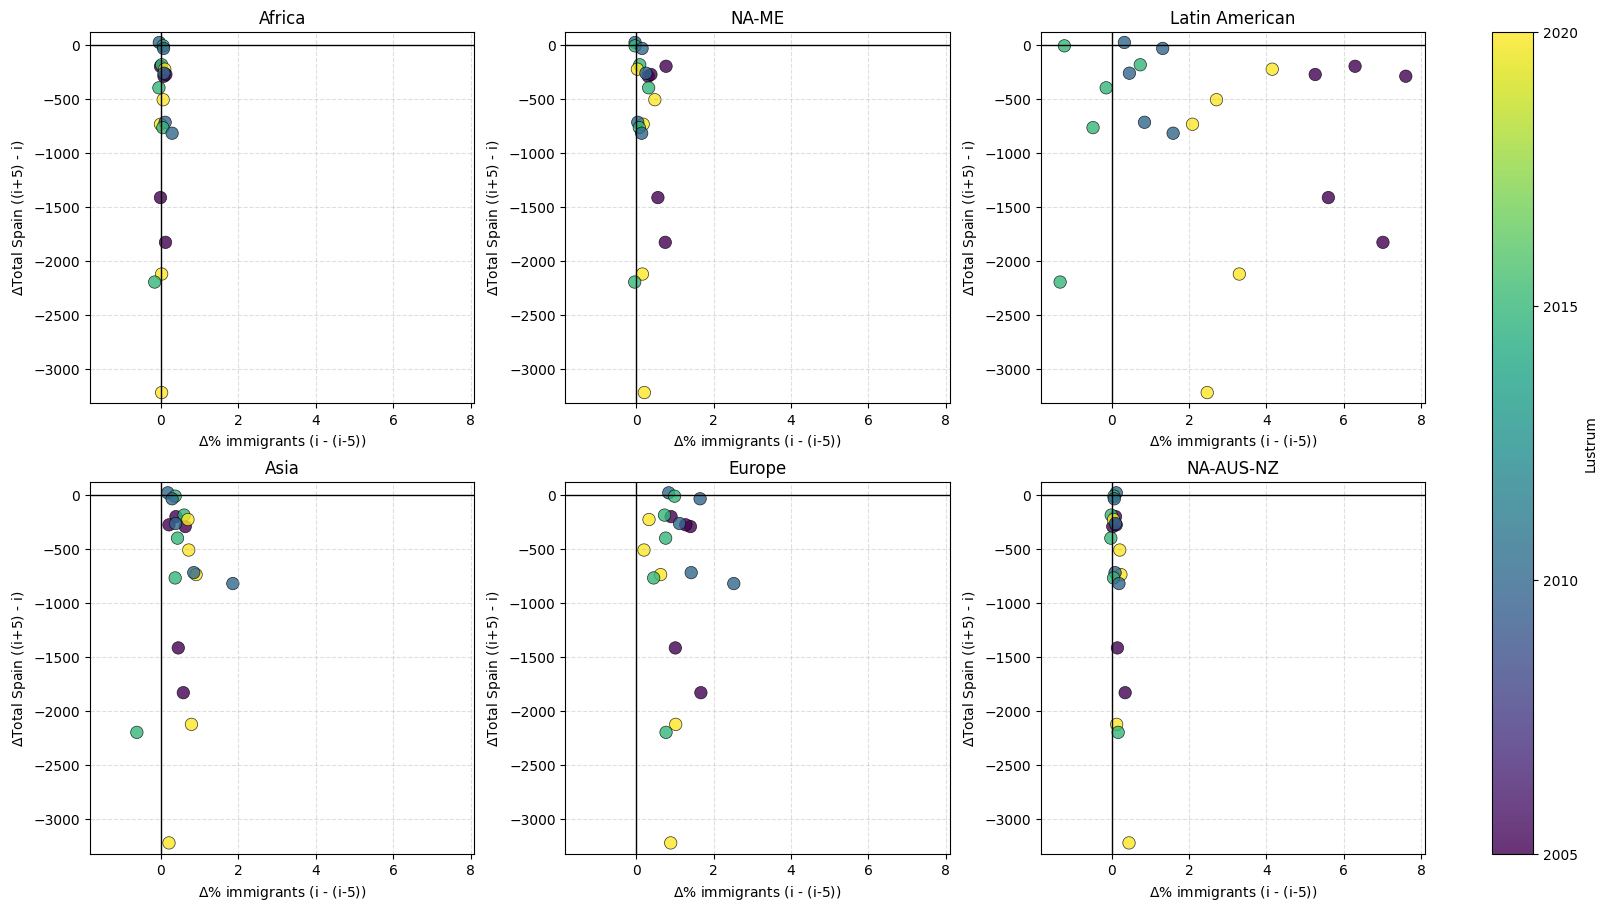

Horta-Guinardó


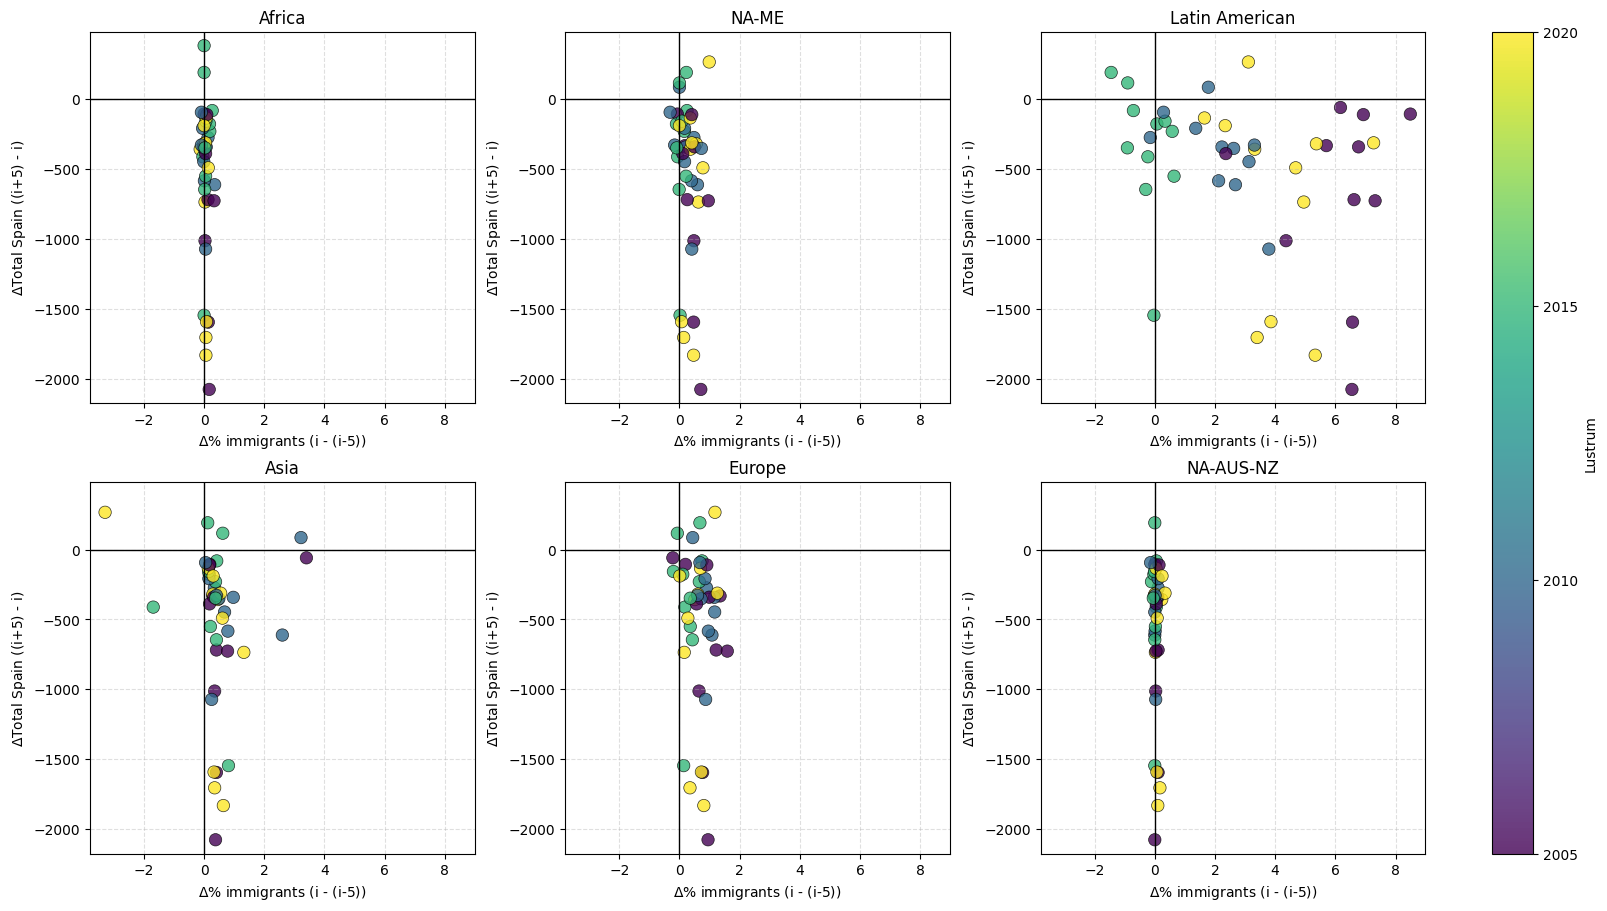

Nou Barris


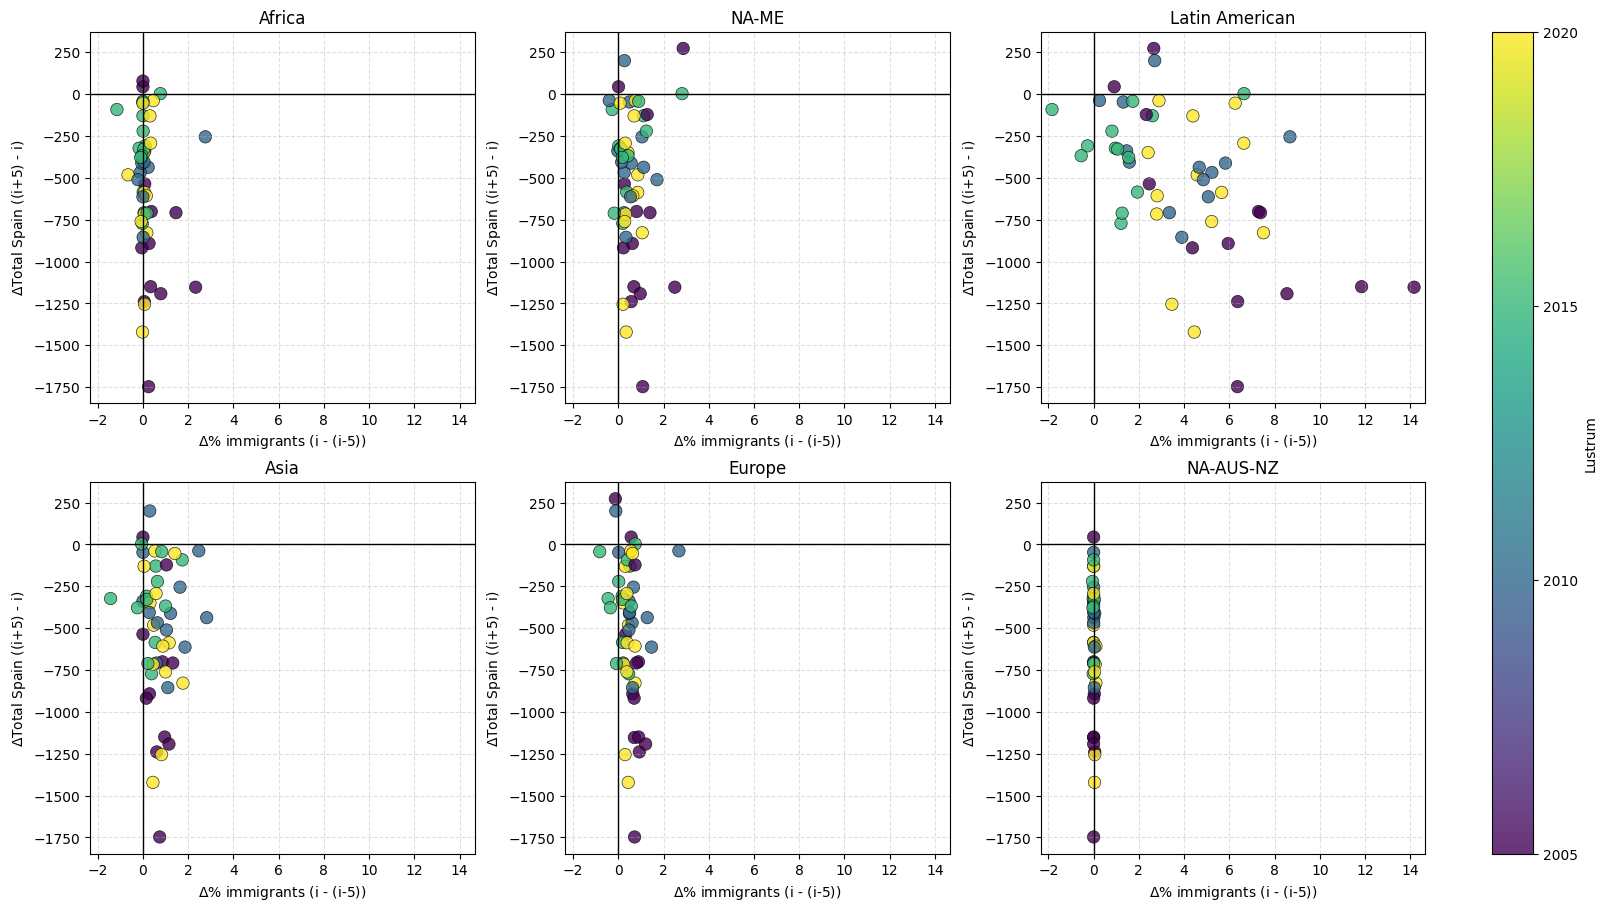

Sant Andreu


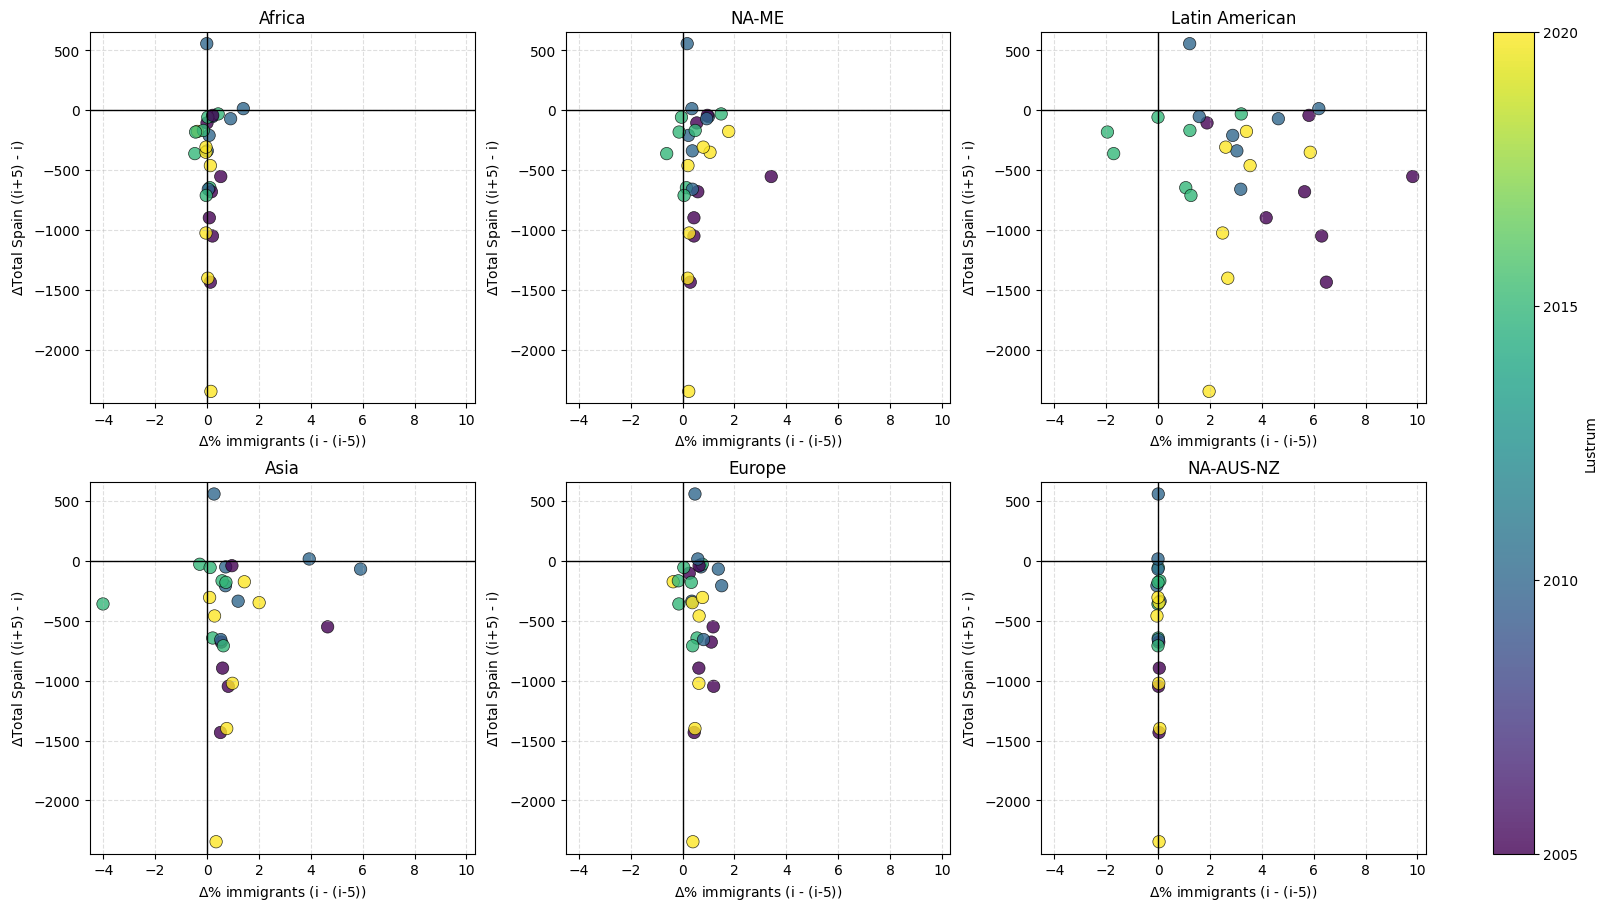

Sant Martí


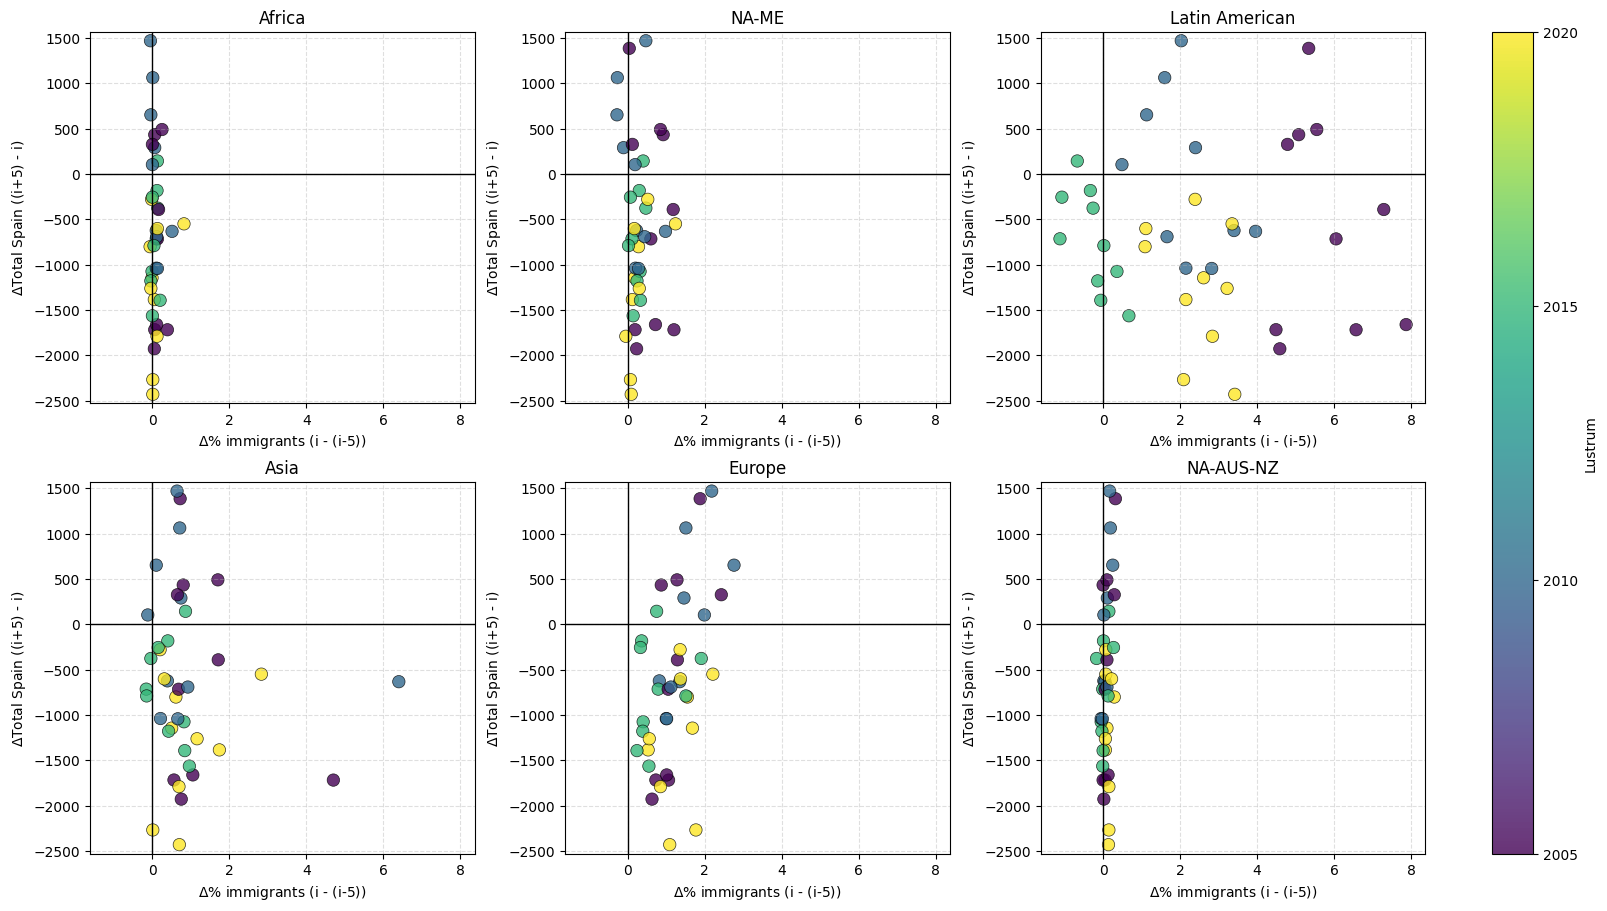

In [84]:
for districte in districtes:
    print(districte)
    representacio_regions_districte(districte,True)